In [109]:
import pandas as pd
import zipfile as zp
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(os.path.dirname('C:\\Users\\David\\Anaconda3\\Sandbox\\Chipy_Mentorship_DataSci_Dojo\\DataSources\\'))
print(os.getcwd())

C:\Users\David\Anaconda3\Sandbox\Chipy_Mentorship_DataSci_Dojo\DataSources


In [3]:
projects = pd.read_csv('opendata_projects.zip',compression='zip')
#projects_chicago = projects[projects['school_city'] == 'Chicago']
#projects_chicago.to_csv('chicago_projects.csv')

In [4]:
projects.head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration
0,7342bd01a2a7725ce033a179d22e382d,5c43ef5eac0f5857c266baa1ccfa3d3f,9e72d6f2f1e9367b578b6479aa5852b7,3.600097e+11,40.688454,-73.910432,Brooklyn,NY,11207.0,urban,...,0.0,251,1,f,f,completed,2002-09-13 00:00:00,2002-09-23 00:00:00,2003-01-27 00:00:00,2003-12-31 00:00:00
1,b56b502d25666e29550d107bf7e17910,57426949b47700ccf62098e1e9b0220c,4a06a328dd87bd29892d73310052f45f,3.600077e+11,40.770233,-73.950760,New York,NY,10075.0,NaN,...,0.0,125,1,f,f,completed,2002-09-16 00:00:00,2002-09-19 00:00:00,2002-12-19 00:00:00,2003-12-31 00:00:00
2,3a88a47f97bd0c9b7c6a745bcd831ce3,7a20087fac86232883537cab45c0a6c9,66d08b506d2f3c30dec9e6fdb03cc279,3.600122e+11,40.729763,-73.816925,Flushing,NY,11367.0,urban,...,0.0,2110,1,f,f,completed,2002-09-17 00:00:00,2003-03-17 00:00:00,2004-06-14 00:00:00,2003-12-31 00:00:00
3,0b8a4f8eb1822ab6dd5cd9ffb918ece3,e5d28482308e2007992ae8b358b31bce,9bc7d4d92193a453669b6e2a56128e87,3.600077e+11,40.701778,-74.011840,New York,NY,10004.0,urban,...,0.0,1241,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2003-12-18 00:00:00,2003-12-31 00:00:00
4,45235cb116b3b35cd86d1c3a63961d7d,214d75bd0e6ce3e7085278ddd8f26daa,f7f12dee0009e6f9afa301bcca9d5070,NaN,40.815018,-73.856094,Bronx,NY,10473.0,urban,...,0.0,83,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2004-01-28 00:00:00,2003-12-31 00:00:00


In [7]:
projects.columns

Index(['_projectid', '_teacher_acctid', '_schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'vendor_shipping_charges', 'sales_tax',
       'payment_processing_charges', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'total_donations', 'num_donors', 'eligible_double_your_impact_match',
       'eligible_almost_home_match', 'funding_status', 'date_posted',
       'date_completed'

In [57]:
train_data = projects.sample(frac=.8)
test_data= projects[~projects.isin(train_data)].dropna()
print("From "+str(len(projects))+" rows "+str(len(train_data))+" will be used for training and "+
      str(len(test_data))+" used for testing")

From 878852 rows 703082 will be used for training and 62412 used for testing


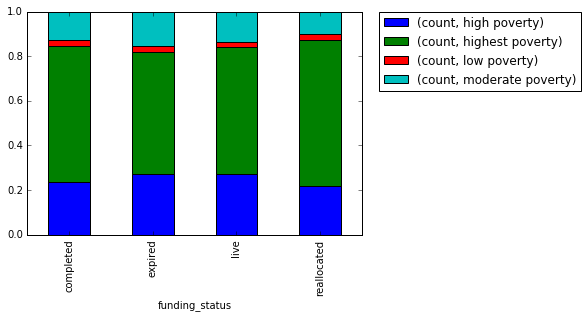

In [152]:
two_level = train_data.groupby(['funding_status','poverty_level'])['_projectid'].count().reset_index()
one_level = train_data.groupby(['funding_status'])['_projectid'].count().reset_index()
summary_data = pd.merge(one_level,two_level,on='funding_status')
summary_data['count'] = summary_data['_projectid_y']/summary_data['_projectid_x']
summary_data = summary_data[['funding_status','poverty_level','count']].set_index(['funding_status','poverty_level'])

summary_data.unstack(level=-1).plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [173]:
#(train_data.vendor_shipping_charges+train_data.sales_tax+train_data.payment_processing_charges+train_data.fulfillment_labor_materials+train_data.total_price_excluding_optional_support)/train_data.total_donations
train_data['percent_covered']=train_data.total_donations/train_data.total_price_excluding_optional_support
#train_data['percent_covered'][np.isinf(train_data['percent_covered'])] = np.nan
#train_data['percent_covered']=train_data['percent_covered'].fillna(0)

In [171]:
#train_data['percent_covered'].describe()
train_data.groupby(['funding_status','poverty_level'])['percent_covered'].mean().reset_index()

,funding_status,poverty_level,percent_covered
0,completed,high poverty,1.160588
1,completed,highest poverty,1.164351
2,completed,low poverty,1.161606
3,completed,moderate poverty,1.161101
4,expired,high poverty,0.094482
5,expired,highest poverty,0.080080
6,expired,low poverty,0.108444
7,expired,moderate poverty,0.111517
8,live,high poverty,0.121568
9,live,highest poverty,0.119615
